<a href="https://colab.research.google.com/github/divy042000/Machine-Learning/blob/main/Gradient_Descent_and_Overfitting_LR_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
def model(param,x):
  y_pred = param[0]* x + param[1]
  return y_pred

def gradient_descent_step(param,data_x,data_y,model,lr):
  # Calculate batch size
  batch_size=
  # Get predictions
  y_pred = model(param,data_x)
  # Calculate loss
  loss =
  loss_list.append(loss)
  # Calculate gradients
  grad_m =
  grad_c =
  cur_m,cur_c=param[0],param[1]
  # Calculate Updated parameters
  nxt_m,nxt_c=
  return (nxt_m,nxt_c) #updated parameters
def gradient_descent(data_x,data_y,model,param,lr,iterations):
    for i in range(iterations):
      param=gradient_descent_step(param,data_x,data_y,model,lr)
      # Add early stopping condition [Hint: use loss_list]

      ####################################################
    return param

SyntaxError: invalid syntax (<ipython-input-2-db1b8f4d036a>, line 7)

In [ ]:
# Create a dataset
M=1
C=1
data_x=np.arange(0,2,0.01)
sample_size=data_x.shape[0]
data_y=np.zeros((sample_size))
for i in range(sample_size):
  data_y[i]=M*data_x[i]+C
######################################

In [ ]:
initial_params=(-1,-1) #initial M,C

lr=0.0001
iterations=50000
loss_list=[]
param=gradient_descent(data_x,data_y,model,initial_params,lr,iterations)
its=np.arange(0,iterations,1)
plt.plot(its,loss_list)
# Adding the title
plt.title("Loss over iterations")
# Adding the labels
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.show()

print("Correct M: {} C: {} ".format(M,C))
print("Initial M: {} C: {} ".format(initial_params[0],initial_params[1]))
print("Derived M: {} C: {} ".format(param[0],param[1]))

In [ ]:
pred_y=np.zeros((sample_size))
for i in range(sample_size):
  pred_y[i]=param[0]*data_x[i]+param[1]

plt.figure(figsize = (8,6))
plt.scatter(data_x,data_y, marker='o', color='blue',label='Original data')
plt.scatter(data_x,pred_y, marker='o', color='red',label='Predicted data')
plt.plot([min(data_x), max(data_x)], [min(pred_y), max(pred_y)], color='black',markerfacecolor='black',
          markersize=10,linestyle='dashed',label=f'Predicted Line y={round(param[0],3)}*x+{round(param[1],3)}')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="lower right")
plt.show()

Overfitting

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Generate training samples
x_train = np.random.rand(100,1)
y_train = - x_train + 3 * (x_train ** 2) - 2 * (x_train ** 3) + 2 + np.random.rand(100,1) * 0.1
# Generate some outlier points in the dataset
x_train_noise = np.random.rand(10,1)
y_train_noise = - x_train_noise + 3 * (x_train_noise ** 2) - 2 * (x_train_noise ** 3) + 2 \
                + np.random.rand(10,1) * 0.5
# Combine 'normal' points and 'outlier' points to a single training set
x_train = np.concatenate((x_train, x_train_noise), axis=0)
y_train = np.concatenate((y_train, y_train_noise), axis=0)
# Generate test samples
x_test = np.random.rand(20,1)
y_test = - x_test + 3 * (x_test ** 2) - 2 * (x_test ** 3) + 2 + np.random.rand(20,1) * 0.1

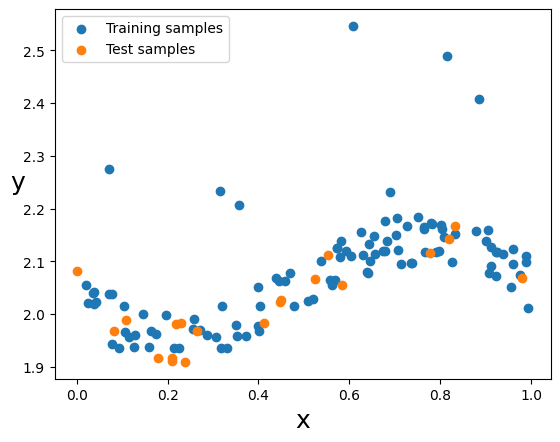

In [5]:
# Plot training samples
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.legend()

Coef: [[0.19193445]] Intercept: [1.97971348]
Train score: 0.007545957924826016
Test score: 0.004346430087795569


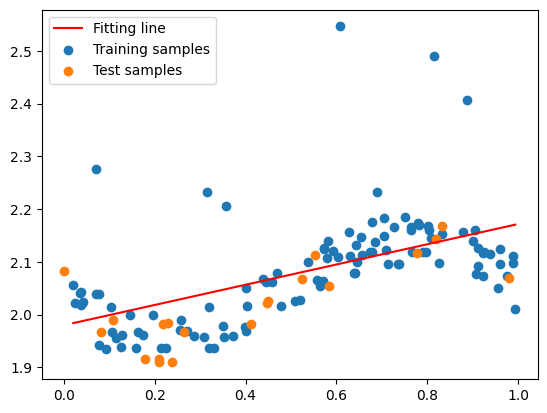

In [6]:
# Generate polynomial features
polynomial_features= PolynomialFeatures(degree=1)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# Create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

# print fitted model
print('Coef:', model.coef_, 'Intercept:', model.intercept_)
print('Train score:', mean_squared_error(model.predict(x_train_poly), y_train))
print('Test score:', mean_squared_error(model.predict(x_test_poly), y_test))
idx = np.argsort(x_train, axis=0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], 'r', label='Fitting line')
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.legend()

Coef: [[-1.08077982  3.22008125 -2.15571248]] Intercept: [2.07671951]
Train score: 0.005849488446121782
Test score: 0.0013528310408230072


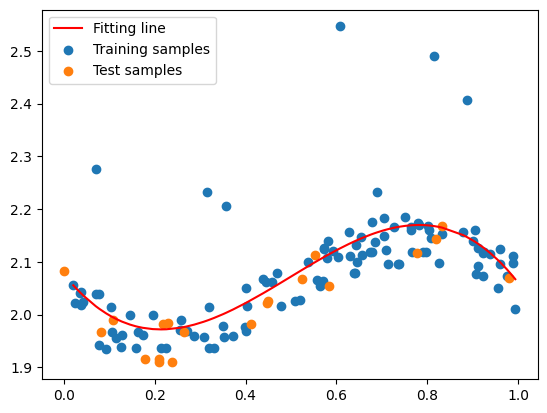

In [7]:
# Generate polynomial features
polynomial_features= PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# Create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

# print fitted model
print('Coef:', model.coef_, 'Intercept:', model.intercept_)
print('Train score:', mean_squared_error(model.predict(x_train_poly), y_train))
print('Test score:', mean_squared_error(model.predict(x_test_poly), y_test))
idx = np.argsort(x_train, axis=0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], 'r', label='Fitting line')
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.legend()

Coef: [[-6.54653999e+02  3.41175194e+04 -9.88394669e+05  1.82686937e+07
  -2.32231192e+08  2.11910071e+09 -1.42189789e+10  7.09749828e+10
  -2.63758808e+11  7.20778747e+11 -1.39831277e+12  1.75555976e+12
  -9.93188820e+11 -6.67482855e+11  1.36558792e+12  7.80675753e+09
  -1.29409911e+12  1.74916063e+11  1.23847128e+12 -1.07606504e+11
  -1.23123529e+12 -5.84319116e+10  1.25508250e+12  1.64982872e+11
  -1.33416559e+12  2.10670167e+10  1.51670515e+12 -1.37605195e+12
   5.20957258e+11 -7.62419179e+10]] Intercept: [7.16521173]
Train score: 0.005000008397938748
Test score: 0.9024869692904114


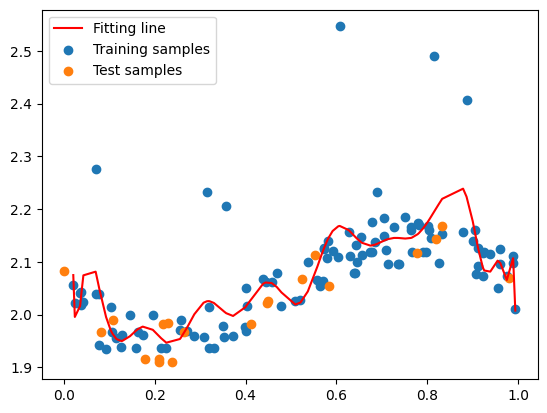

In [8]:
# Generate polynomial features
polynomial_features= PolynomialFeatures(degree=30)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# Create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

# print fitted model
print('Coef:', model.coef_, 'Intercept:', model.intercept_)
print('Train score:', mean_squared_error(model.predict(x_train_poly), y_train))
print('Test score:', mean_squared_error(model.predict(x_test_poly), y_test))
idx = np.argsort(x_train, axis=0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], 'r', label='Fitting line')
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.legend()